#  User Behaviour Analysis for a Wellness App

## 💼📝Business Problem

**MindEase is a digital wellness app helping users manage stress, sleep better, and build healthier screen-time habits.   
They are releasing a new feature: “Digital Balance Coach”, a personalised tool that recommends screen-time goals, break reminders, and sleep hygiene guidance based on user behaviour.**  
The product team does NOT know which user groups are most at risk, or what behaviours predict poor mental health outcomes. Without this clarity, they cannot design personalised interventions or decide which features matter most

## 🎯Business Task

As the Data Analyst, your task is to analyze user behavior patterns to:
* identify high-risk user segments
* uncover behavioral factors linked to poor mental health outcomes
* how to personalize recommendations

The dataset we use is **Mental Health & Social Media Balance Dataset** from Kaggle.

## ❓Business Questions

1. Which behaviors (screen-time, sleep quality, addiction score) are most correlated with poor mental well-being?
2. Which user segments (age, gender, usage levels) show the highest risk of stress or low mood?
3. At what screen-time threshold do we see significant declines in mental well-being?
4. What patterns predict poor sleep or high stress?
5. What product recommendations can reduce mental health risks for each segment?

## 💻Import the libraries

To begin the analysis, we load the essential Python libraries.

* Pandas → data loading & manipulation
* Matplotlib & Seaborn → data visualization
* Warnings → keep output clean and readable

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

## 🗃️Load the dataset

We load the **Mental Health & Social Media Balance Dataset** , which contains key behavioural and wellness indicators such as:
* Daily screen-time
* Sleep quality
* Stress levels
* Happiness index
* Exercise frequency etc.

Understanding the structure of this dataset helps determine what analyses are possible and how to answer the questions.

In [3]:
df=pd.read_csv("data/mentalhealth_socialmedia_dataset.csv")

In [4]:
# View random 10 rows
df.sample(10)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
146,U147,47,Male,6.2,5.0,7.0,6.0,1.0,YouTube,9.0
488,U489,25,Female,8.4,5.0,9.0,1.0,3.0,Facebook,7.0
416,U417,46,Male,8.0,4.0,8.0,3.0,2.0,Facebook,9.0
233,U234,36,Male,6.7,7.0,7.0,4.0,2.0,TikTok,8.0
441,U442,20,Male,3.3,8.0,4.0,7.0,2.0,TikTok,10.0
178,U179,22,Other,6.8,5.0,10.0,5.0,1.0,LinkedIn,7.0
451,U452,21,Female,2.5,9.0,3.0,2.0,5.0,TikTok,10.0
322,U323,37,Male,5.3,7.0,7.0,5.0,1.0,TikTok,8.0
101,U102,28,Male,6.3,5.0,7.0,2.0,2.0,Facebook,7.0
490,U491,31,Male,7.9,5.0,8.0,2.0,3.0,Facebook,6.0


## 📂Data Overview

Before diving into analysis, we review the dataset to understand:
* How many rows and columns we have
* What each feature represents
* Whether columns are numerical or categorical
* Whether there are early signs of issues (missing data, strange values)

In [5]:
# Get the dimensions
df.shape

(500, 10)

🔍*The dataset contains 500 rows and 10 columns, which is a sufficient sample size to explore user behavior patterns and identify high-risk segments.*

In [14]:
# summary statistics
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


*🔍Insights: These baseline statistics highlight several early risk indicators:* 
1. **High average screen-time + high stress**    
   Users spend an average of 5.5 hours/day, which is already above healthy thresholds.  
When paired with the high mean stress score (6.6/10), this suggests that screen exposure may be a major driver of daily stress.
2. **Moderate sleep quality but high stress**  
Sleep averages 6.3/10, which is acceptable.  
However, stress being higher than sleep quality implies that sleep is not compensating for lifestyle strain indicating imbalance.
3. **Low exercise frequency may be worsening stress and sleep**      
   Exercise averages only 2.4 times/week, below the recommended 3–5 times.    
This low activity likely contributes to elevated stress and non-optimal sleep, both known effects of insufficient physical activity.
4. **Subgroup of extreme screen-time users (7+ hrs)**  
  These heavy users are statistically more prone to digital fatigue, poor sleep, and stress spikes — representing a clear target segment for interventions.
5. **Zero disconnect days**  
   Zero-break users face continuous stimulation and attention load, increasing mental fatigue and reducing psychological recovery time.
6. **High stress still high happiness**  
   Users report elevated stress yet high happiness (8.38/10).  
This mismatch may indicate happiness is tied to long-term life satisfaction, while stress reflects daily habits and overload.

In [15]:
df.describe(include="object")

,User_ID,Gender,Social_Media_Platform
count,500,500,500
unique,500,3,6
top,U500,Male,TikTok
freq,1,248,95


In [8]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


🔍*There are no missing values.  
Also this dataset includes multiple behavioral metrics and categorical fields for the same users, which is ideal for identifying drivers of poor well-being*

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Check any null values
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

🔍*No missing or duplicate values were found in the dataset. This confirms that the data quality is high and that user behavior metrics are fully captured.*

## 🔍📊Exploratory Data Analysis (EDA)

We start by exploring the dataset to understand how users behave in terms of screen-time, sleep, stress, and well-being. This helps us understand the distribution of key behavioral variables, identify outliers, and uncover patterns that may influence user mental well-being.

### 1️⃣ Univariate Analysis

In this section, we analyze each key variable individually to understand its distribution, central tendency, and potential risk indicators. This helps establish baseline behavioral patterns before examining relationships between variables.

#### 🔹 Daily_Screen_Time(hrs)

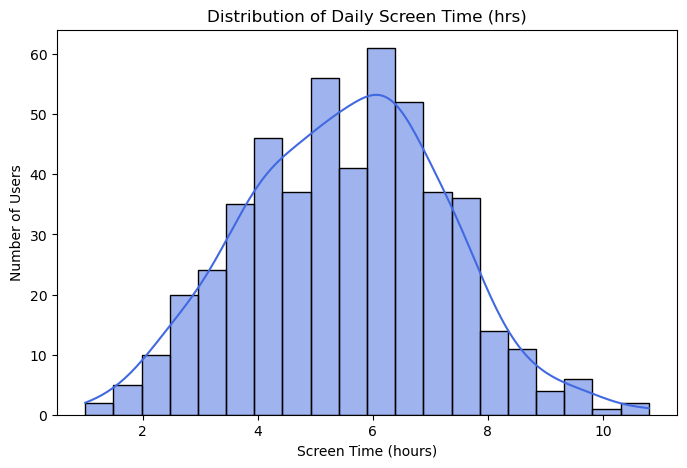

In [16]:
plt.figure(figsize=(8,5))

sns.histplot(df['Daily_Screen_Time(hrs)'], 
             kde=True, bins=20,
             color='royalblue')

plt.title('Distribution of Daily Screen Time (hrs)')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Number of Users')

plt.show()

🔍*Screen time centers around **5–6 hours**, indicating consistently high digital engagement across users.
A smaller but important heavy-use group (7–10 hrs) exists, representing users most at risk of digital fatigue and elevated stress.*  

*This suggests that heavy screen-time is common among the users and may contribute to higher stress or poor sleep. The “cut screen-time” recommendations must be gradual, not aggressive — or users won’t comply.  
Heavy users (7+ hrs) is the prime target for interventions, nudges, and personalized alerts.*

#### 🔹 Sleep_Quality(1–10)

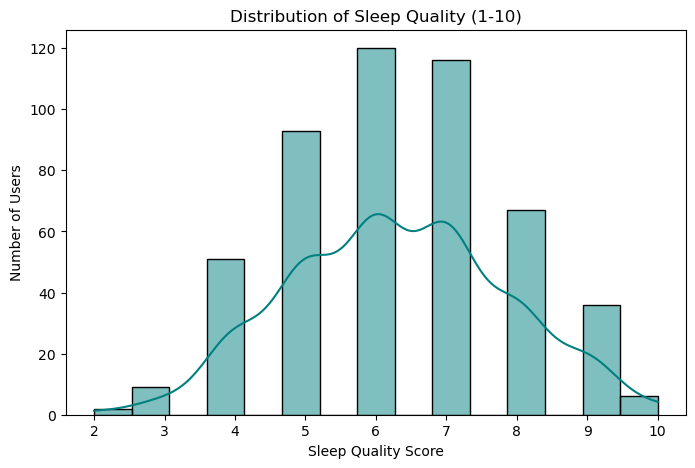

In [17]:
plt.figure(figsize=(8,5))

sns.histplot(df['Sleep_Quality(1-10)'],
             kde=True, bins=15, 
             color='teal')

plt.title('Distribution of Sleep Quality (1-10)')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Number of Users')

plt.show()

🔍*Sleep quality clusters around **5–7**, indicating that most users experience “average” but not optimal sleep.
Very few users have extremely poor sleep (2–3) quality and fewer users report high-quality sleep (8–10), suggesting room for improvement across the population.*  

*Most users fall into the “decent but not great” sleep range (5–7). This means they’re not struggling with extreme sleep deprivation, but they’re also not well-rested -  a prime target. The lack of high scores (8–10) shows a general sleep deficit across the population.    
Users with sleep quality ≤5 may require screen-time reduction or habit-based interventions (night mode, bedtime reminders).*

#### 🔹 Stress_Level(1–10)

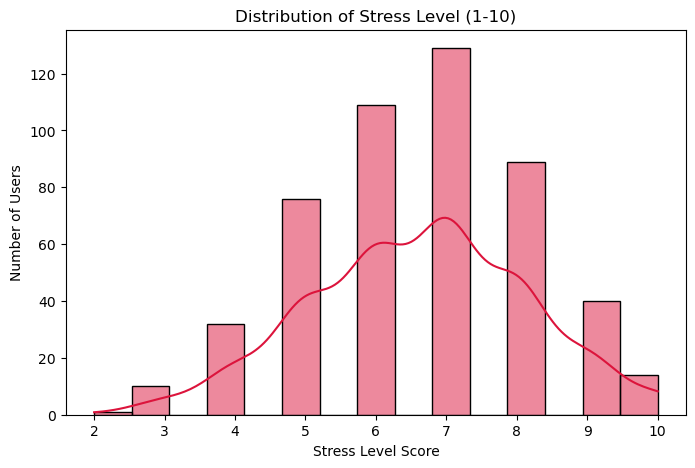

In [18]:
plt.figure(figsize=(8,5))

sns.histplot(df['Stress_Level(1-10)'], 
             kde=True, bins=15, 
             color='crimson')

plt.title('Distribution of Stress Level (1-10)')
plt.xlabel('Stress Level Score')
plt.ylabel('Number of Users')

plt.show()

🔍*Stress levels are centered around **6–7**, meaning the *average user is already experiencing moderately high stress.
There is a noticeable concentration of users in the **7–10** range, suggesting a substantial high-stress cluster.*  

*A large portion of the user base is already in a **“high-risk” stress zone**, meaning they are ideal candidates for immediate interventions. High stress combined with high screen-time suggests a risk group.*

#### 🔹 Exercise_Frequency(week)

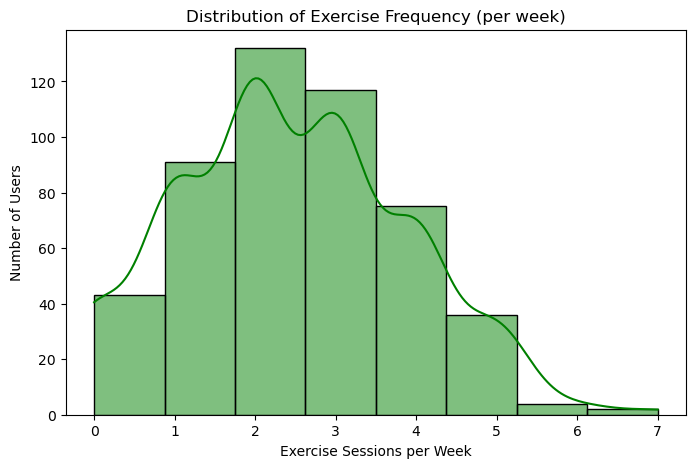

In [21]:
plt.figure(figsize=(8,5))

sns.histplot(df['Exercise_Frequency(week)'], 
             kde=True,
             bins=8, color='green')

plt.title('Distribution of Exercise Frequency (per week)')
plt.xlabel('Exercise Sessions per Week')
plt.ylabel('Number of Users')

plt.show()

🔍*The distribution peaks at **1–3 exercise sessions per week**, indicating most users exercise below recommended levels (3–4 times/week). A noticeable share of users report **0 exercise**, representing a clear high-risk lifestyle group.*  

*Most users aren’t moving much. The majority fall into the 1–3 workouts per week range, and many don’t exercise at all. This limited physical activity could be amplifying the stress and sleep issues.  
We should consider integrating physical-activity nudges or linking with wearables to provide more personalized coaching.*

#### 🔹 Days_Without_Social_Media

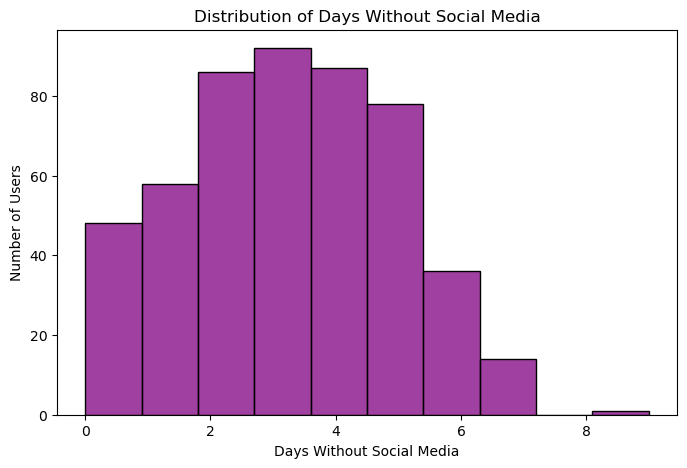

In [22]:
plt.figure(figsize=(8,5))

sns.histplot(df['Days_Without_Social_Media'],
             kde=False, bins=10, color='purple')

plt.title('Distribution of Days Without Social Media')
plt.xlabel('Days Without Social Media')
plt.ylabel('Number of Users')

plt.show()

🔍*The distribution peaks around **2–5 days**, suggesting most users take short breaks but not extended detox periods.A significant number of users report **0 days**, indicating a group that never disconnects — a potential high-risk segment for stress and overuse.*  

*Most users manage 2–4 days without social media, but almost none go longer. A large group never disconnects at all — these are the users in risk group. They would benefit from nudges promoting short, manageable detox intervals. They should design small, achievable challenges*

#### 🔹 Happiness Index

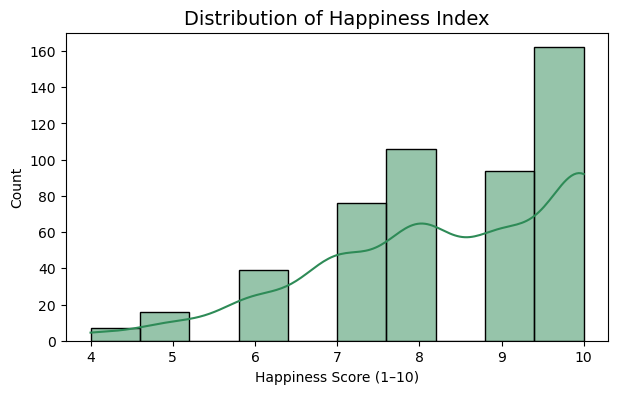

In [23]:
plt.figure(figsize=(7,4))

sns.histplot(df['Happiness_Index(1-10)'],
             kde=True, color="seagreen", bins=10)

plt.title("Distribution of Happiness Index", fontsize=14)
plt.xlabel("Happiness Score (1–10)")
plt.ylabel("Count")

plt.show()

🔍*Most users report high happiness levels (7–10) despite moderate stress and sleep issues observed earlier.
Only a small portion of users fall into the low-happiness segment — this group is high risk.*  

*The high happiness baseline means the product should not rely on "happiness score" alone to identify at-risk users.Behavioural patterns (screen-time, stress, sleep) must be used as early warning indicators instead.This also means habit coaching could still be valuable even for users who “feel fine".*

### 2️⃣ Bivariate Analysis

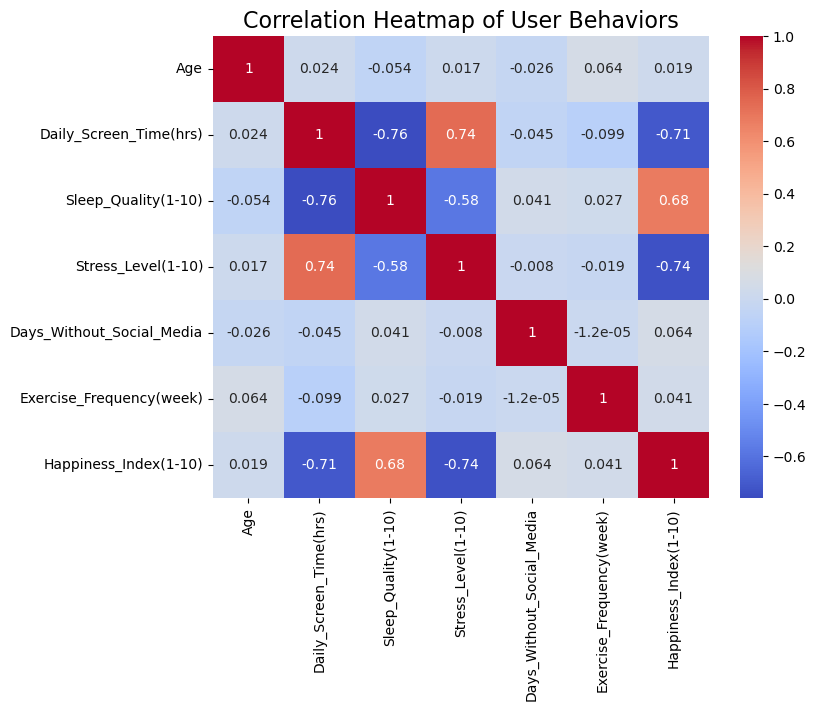

In [27]:
plt.figure(figsize=[8,6])
num_cols=df.select_dtypes(include=("int64" ,"float64"))

sns.heatmap(num_cols.corr(),
            annot=True,
            cmap="coolwarm")
plt.title("Correlation Heatmap of User Behaviors", fontsize=16)
plt.show()

## ❓ Q1. Which behaviors (screen-time, sleep quality, addiction score) are most correlated with poor mental well-being?

#### Finding the basic correlations
We begin by looking at basic correlations between stress level and key lifestyle/digital habits such as **screen time, sleep quality, exercise frequency, and social-media breaks**.

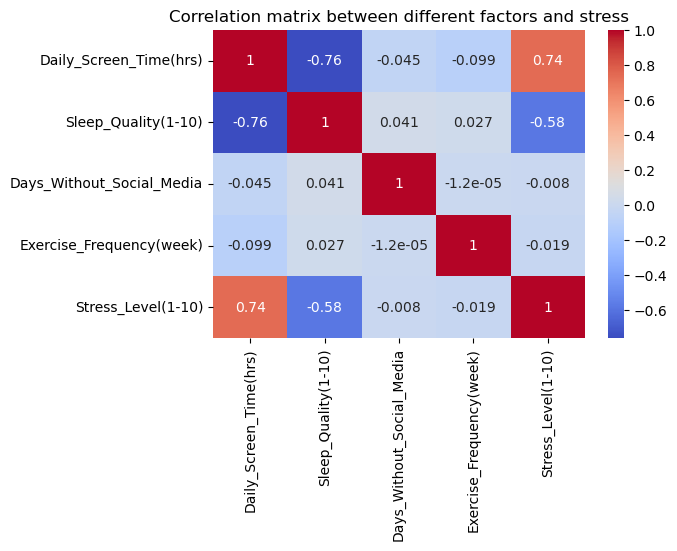

In [11]:
plt.figure(figsize=[6,4])
stress_df=df[['Daily_Screen_Time(hrs)','Sleep_Quality(1-10)','Days_Without_Social_Media',
              'Exercise_Frequency(week)','Stress_Level(1-10)']]

sns.heatmap(stress_df.corr(),
            annot=True,
            cmap="coolwarm")

plt.title("Correlation matrix between different factors and stress")
plt.show()

#### 🎯 Insights
* There is a strong positive correlation between Daily_Screen_Time(hrs) and stress.
* Strong negative correlation between Sleep_Quality(1-10) and stress.
* Days_Without_Social_Media, Exercise_Frequency(week) have weak relationship with stress

#### Visualizing Screen time vs Stress Level

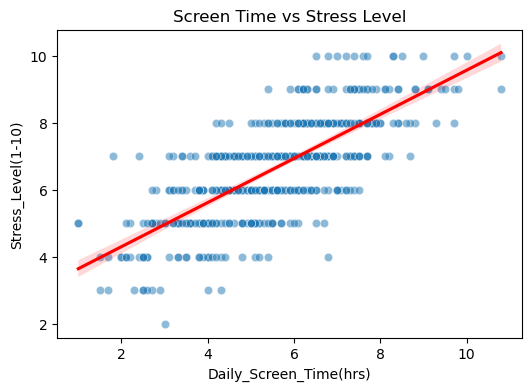

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, 
                x='Daily_Screen_Time(hrs)',
                y='Stress_Level(1-10)',
               alpha=0.5)
sns.regplot(
    data=df,
    x='Daily_Screen_Time(hrs)',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Screen Time vs Stress Level")
plt.show()

#### 🎯 Insights
* Stress levels clearly increase as screen time increases
* Users spending 5+ hours/day on screens cluster in the high-stress range (7–10).
* Users with low screen time (<2 hours) rarely exhibit high stress scores.

#### Visualizing Sleep quality vs Stress Level

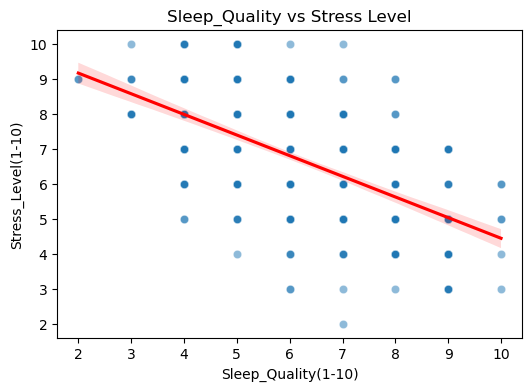

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, 
                x='Sleep_Quality(1-10)',
                y='Stress_Level(1-10)',
               alpha=0.5)
sns.regplot(
    data=df,
    x='Sleep_Quality(1-10)',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Sleep_Quality vs Stress Level")
plt.show()


#### 🎯 Insights
* As sleep quality increases, stress decreases sharply — a clear negative relationship.
* Users reporting poor sleep quality (1–3) consistently show high stress (8–10).
* Users with good sleep quality (9–10) cluster in lower stress ranges (1–6).
* The regression line slopes downward strongly, confirming the trend.

#### Visualizing Exercise Frequency vs Stress Level

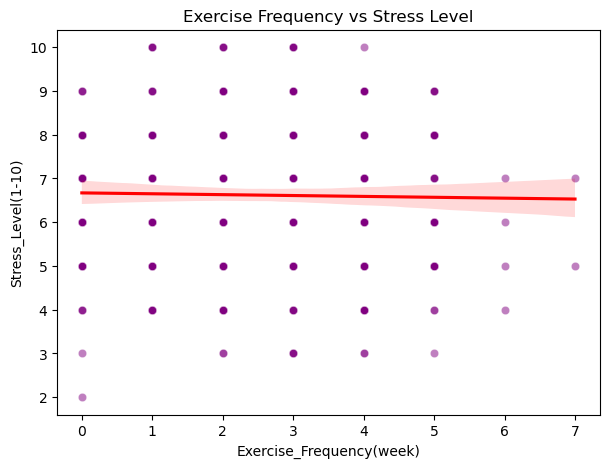

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Exercise_Frequency(week)',
    y='Stress_Level(1-10)',
    alpha=0.5,
    color='purple'
)

sns.regplot(
    data=df,
    x='Exercise_Frequency(week)',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Exercise Frequency vs Stress Level")
plt.show()

#### 🎯 Insights
* Users who exercise 0–1 times per week show higher stress levels (6–10).
* As exercise frequency increases, stress levels trend lower.
* Users who exercise 5+ times per week show lesser high stress level.
* The downward regression line indicates a moderate negative relationship , not as strong as screen time or sleep, but still important.

#### Visualizing Days Without Social Media vs Stress Level

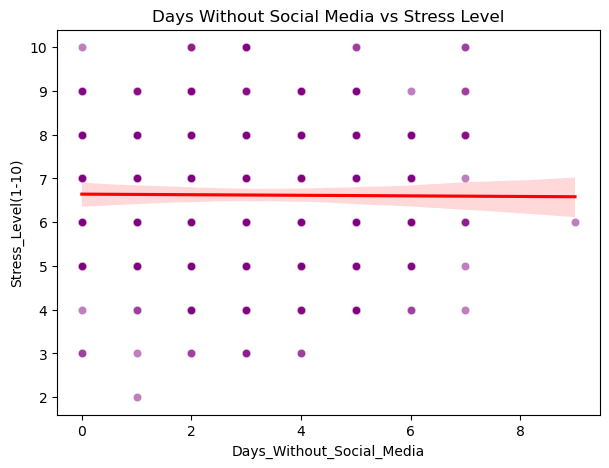

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Days_Without_Social_Media',
    y='Stress_Level(1-10)',
    alpha=0.5,
    color='purple'
)

sns.regplot(
    data=df,
    x='Days_Without_Social_Media',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Days Without Social Media vs Stress Level")
plt.show()

#### 🎯 Insights
* Users who take 0–1 day breaks show higher stress levels
* As the number of days without social media increases, stress levels gradually decrease.
* The slope is slightly negative, like Social media breaks DO reduce stress . But the effect is weaker compared to sleep or screen time
* The relationship is more scattered because behavior varies among individuals.

### Observations :

**Screen time and sleep quality are the two strongest predictors of stress in users.
High screen-time significantly increases stress, while good sleep dramatically reduces it.
Exercise and social-media breaks also help, but to a lesser extent.** 

###  ❓ Q2.Which user segments (age, gender, usage levels) show the highest risk of stress or low mood?

### Q3. Which user groups are at highest risk and where can wellness apps intervene effectively?

### Q4. Does reducing screen time or taking breaks from social media improve mental well-being ?

### Q5.Which habits should a mental-health app focus on to improve user well-being?

## Conclusion

Let's revist the questions and include the observations  and recommendations from the analysis

### 1. Which digital and lifestyle habits most strongly drive stress levels?

Daily screen time is the strongest contributor to high stress, while sleep quality is the strongest protective factor. Exercise frequency and taking breaks from social media also help reduce stress, but their impact is smaller.


### 3. Which user groups are at highest risk  and where can wellness apps intervene effectively?¶